# Practical 2) Equilibrium partitioning

Aerosol particles grow and shrink under varying saturation ratios of gas phase products. Understanding how volatility relates to properties of the condensing compound and state of the aerosol particle is a huge area of research. In this practical we implement equilibrium absorptive partitioning theory and calculate the mass loading of condensed material given an initial absorptive mass. In other words, given an existing mass of particulate matter and material in the gas phase, how much particulate matter are we left with? We also practice implementing a method for finding the root of an equation in order to solve the partitioning equation. Whilst you could use an existing solver, this is to further practice converting theory to code.

<div class="alert alert-block alert-success">
<b>Objectives:</b> The objectives and exercises for today's practical are:

 - 1) [Objective 1 - Implement the equilibrium absorptive partitioning equations](#Part1)
      * [Exercise 1: Plot partitioning coefficients given an existing mass](#Exercise1)
      * [Exercise 2: Create a volatility distribution](#Exercise2)
      * [Exercise 3: Predict condensed mass from one interation of partitioning](#Exercise3)
 - 3) [Objective 2 - Calculate the equilibrium mass after partitioning of volatile material](#Part2)
      * [Exercise 4: Implement Newton-Raphson method of finding a root](#Exercise4)

Please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

<div class="alert alert-block alert-warning">
<b>Please note:</b> After reading the instructions and aims of any exercise, if some boilerplate is already provided, search the code snippets for a note that reads ------'INSERT CODE HERE'------ to identify where you need to write your code 
</div>



## Objective 1 - Implement the equilibrium absorptive partitioning equations  <a name="Part1">

Some models assume instantaneous partitioning, thus instantaneous equilibrium, between the condesed and gaseous phases. This has some limitations, but in some conditions this might be a reasonable assumption to make. In any case it can be very useful to estimate how much condensed mass might result from partitioning if a gas phase abundance and volatility of this material can be estimated. Most of the atmospheric aerosol community use the mass based equilibrium absorptive partitioning theory presented in [Donahue et al (2006)](https://pubs.acs.org/doi/10.1021/es052297c). This is captured in the following equations:

\begin{equation}
C_{OA} = \sum_{i} C_{i}\varepsilon _{i} + core \\
\varepsilon _{i}=\left ( 1+ \frac{C_{i}^{*}}{C_{OA}} \right )^{-1} \\
C_{i}^{*}=\frac{10^{6}M_{i}\gamma _{i}P_{i}^{0}}{RT}
\end{equation}

where $C_{OA}$ is the total condensed mass of, usually, organic aerosol given in $\mu g.m^{-3}$, $C_{i}$ is the gas phase abundance of compound $i$, $\varepsilon _{i}$ the partitioning coefficient of compound $i$ and $core$ the abundance of an assumed involatile core. $C_{i}^{*}$ is a measure of component volatility and, as shown in the second equation, relates to the compound mass ($M_{i}$), activity coefficient in the condensed phase $\gamma _{i}$ and pure component vapour pressure $P_{i}$, where $R$ is the ideal gas constant and $T$ the temperature. 

The following schematic illustrates the multiple dependencies:

<img src="images/Equil_partition_schematic1.png" alt="Drawing" style="width: 500px;"/>

The units of $C_{i}^{*}$ are typically given in $\mu g.m^{-3}$ and represents the condensed abundance when half of the compound is split between the gas and condensed phase. We want to arrive at a value of $C_{OA}$. However, each time $C_{OA}$ is updated, $\varepsilon _{i}$ changes and so on. We thus need to implement an iterative method for finding the root of our equation. We can use the Newton-Raphson method and re-write our partitioning equation so that the root represents the equilibrium position. We will look at this in exercise 4.

Now we have all of the equations we need to begin our practicals.

<div class="alert alert-block alert-success">
<b> Exercise 1. Plot partitioning coefficients given an existing mass <a name="Exercise1"> </b> 
   
We have been told that the partitioning coefficients are given by the following equations:

\begin{equation}
\varepsilon _{i}=\left ( 1+ \frac{C_{i}^{*}}{C_{OA}} \right )^{-1} \\
\end{equation}

In this exercise we are given the following information:

 - We have an existing condensed mass of 20$\mu g.m^{-3}$
 - We assume that our volatilities, thus $C_{i}^{*}$ is defined by an array of log10 seperated values from $10^{-6}$ to $10^{3}$
 
Your task is to populate an array of $\varepsilon _{i}$ and then plot the values. You should arrive at the same figure given below:

![title <](images/Prac2_ex1.png)

In the code snippet below I have provided some boiletplate, and your task is to insert the relevant code where required. As we are using Python for these exercises, you might find the following functions useful to create an array of linearly seperated numbers and raise an array to a power:

```python
import numpy as np
# Define an array of linearly seperated values
x = np.linspace(<<start>>,<<end>>,<<number of values>>)
y = np.power(<<base>>,<<power>>)
```


[-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.]
[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


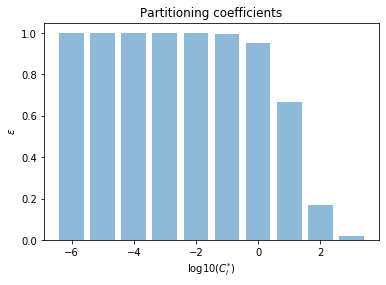

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ------'INSERT CODE HERE'------
log_c_star = np.linspace(-6, 3, 10) # Array of log10 C* values
Cstar =  # Array of C* values
# ------------------------------
print(log_c_star)
print(Cstar)

COA = 20.0 # Existing condensed mass

# ------'INSERT CODE HERE'------
epsilon =  # Partitioning coefficients
# ------------------------------

plt.bar(log_c_star, epsilon, align='center', alpha=0.5)
plt.ylabel(r'$\varepsilon$')
plt.xlabel(r'log10($C_{i}^{*}$)')
plt.title(r'Partitioning coefficients')
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise 2. Create a volatility distribution <a name="Exercise2"> </b> 
   
In this exercise, I would like you to initialise an array which holds information on the abundance of material in each $C_{i}^{*}$ bin. This is another chance to practice some basic Python. We have been given the following information on abundance as a function of volatility.

| Log10($C_{i}^{*}$) | Abundance ($\mu g.m^{-3}$) |
|------|------|
| -6 | 0.1 |
| -5 | 0.1 |
| -4 | 0.1 |
| -3 | 0.3 |
| -2 | 0.6 |
| -1 | 1.0 |
| 0 | 1.5 |
| 1 | 3.0 |
| 2 | 2.0 |
| 3 | 1.0 |


Your task is to populate an array of $\varepsilon _{i}$ and then plot the values. You should arrive at the same figure given below:

![title <](images/Prac2_ex2.png)

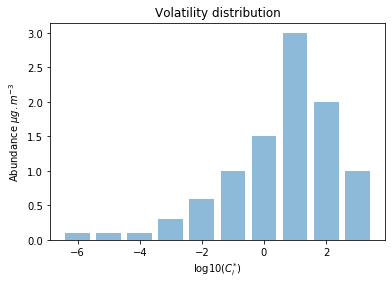

In [4]:
# Populate volatility basis set with gas phase abundance
abundance = np.zeros((10), dtype = float)

# ------'INSERT CODE HERE'------
abundance[0] = 
# ------------------------------

plt.bar(log_c_star, abundance, align='center', alpha=0.5)
plt.ylabel(r'Abundance $\mu g.m^{-3}$')
plt.xlabel(r'log10($C_{i}^{*}$)')
plt.title(r'Volatility distribution')
plt.show()


<div class="alert alert-block alert-success">
<b> Exercise 3. Predict condensed mass from one interation of partitioning <a name="Exercise3"> </b> 
   
Now we need to implement the equation that gives as a value for our condensed mass. Just to remind ourselves, we have already met the following equations:

\begin{equation}
C_{OA} = \sum_{i} C_{i}\varepsilon _{i} + core \\
\varepsilon _{i}=\left ( 1+ \frac{C_{i}^{*}}{C_{OA}} \right )^{-1} \\
\end{equation}

You have just initialised an array of compound abundance, $C_{i}$ , set of 10 discrete volatility bins. You have also created a method for predicting partitioning coefficients $\varepsilon _{i}$. In this exercise I would like you to write a function that takes $C_{i}$, an existing core, the abundance of every compound, an initial estimate for $C_{OA}$ and thus calculates $\varepsilon _{i}$ and passes back a new value for $C_{OA}$.

Functions in Python are written as follows

```python
# Define a function 'test' that takes in variables x,y and outputs z
def test(x,y):
    
    z = x*y
    
    return z

# Initialise variables
x=3.0
y=4.0

# Call text
z = test(x,y)
```

In the code snippet below I have initilised a core mass and also the function name, but left input variables and output variables for you to finish

</div>

In [12]:
# Function to take core, gas phase abundance and predict a subsequent condensed mass
core=20.0

# ------'INSERT CODE HERE'------
def partitioning(Cstar,abundance,COA_init,core): 
    # In the first instance we need to calculate mass that condenses from the core alone
    # Partitioning coefficient
    epsilon = 
    # Partitionined mass
    COA = np.sum(epsilon*abundance)                    
    return COA
# ------------------------------

COA = partitioning(Cstar,abundance,0.0,core)
                       
print("Total condensed mass from one iteration = ", COA)
    

Total condensed mass from one iteration =  5.976222076341432


## Objective 2 - Calculate the equilibrium mass after partitioning of volatile material  <a name="Part2">

In the Newton-Raphson method, if we have a function $f$ of a variable $x$, each iteration gives us a new estimate for $x$ through the following:

\begin{equation}
x_{1} = x_{o} - \frac{f(x_{o})}{f^{'}(x_{o})}
\end{equation}

where $f^{'}(x_{o})$ is, normally, the analytical expression for the gradient of $f$ with respect to $x$. Below I have re-written our partitioning equation so we can use this method to find the value of $C_{OA}$ when $C_{OA} - \sum_{i} C_{i}\varepsilon _{i} + core$ is equal to zero.

\begin{equation}
f(x_{o}) = C_{OA} - \sum_{i} C_{i}\left ( 1+ \frac{C_{i}^{*}}{C_{OA}} \right )^{-1} + core \\
f^{'}(x_{o})= 1 - \sum_{i} C_{i} \left ( 1+ \frac{C_{i}^{*}}{C_{OA}} \right )^{-2}\frac{C_{i}^{*}}{C_{OA}^{2}}
\end{equation}

The following schematic illustrates 3 example steps in the Newton Raphson method as we progress towards the equilibrium value for $C_{OA}$

<img src="images/Equil_partition_schematic2.png" alt="Drawing" style="width: 700px;"/>

<div class="alert alert-block alert-success">
<b> Exercise 4: Implement the Newton-Raphson method of finding the equilibrium value of $C_{OA}$ <a name="Exercise4"> </b> 
    
This exercise is a little more involved but also serves as practice in considering appropriate code design. In the following code snippet I provide three skeleton function definitions which are used to arrive at the final value for $C_{OA}$. 

Once all functions are defined, we call the function 'Newtons_method' with our definitions of $C_{i}^{*}$, abundance, initial guess for $C_{OA}$ and core mass, which passes back the equilibrium value for $C_{OA}$ which we call 'COA_final'.

Using the previously defined $C_{i}^{*}$ and abundances, with a core mass of 20 $\mu g.m^{-3}$ you should arrive at a value of 6.99 $\mu g.m^{-3}$ for our total condensed volatile mass.

</div>

In [21]:
# Function to take core, gas phase abundance and predict subsequent condensed mass
core=20.0

def partitioning(Cstar,abundance,COA,core): 
    # In the first instance we need to calculate mass that condenses from the core alone
    # Partitioning coefficient
    # ------'INSERT CODE HERE'------
    epsilon = 
    # Partitionined mass
    COA = np.sum(epsilon*abundance) 
    # ------------------------------
    return COA

def partitioning_dash(Cstar,abundance,COA,core): 
    # ------'INSERT CODE HERE'------
    epsilon = 
    COA_dash = np.sum(epsilon*abundance)   
    # ------------------------------
    return COA_dash

def Newtons_method(Cstar,abundance,COA_init,core):
    
    COA = partitioning(Cstar,abundance,COA_init,core)    
    
    # ------'INSERT CODE HERE'------
    f = 
    f_dash = 
    # ------------------------------
    
    COA_new = COA - f/f_dash
    
    
    while (abs(COA_new/COA) > 0.05):
        
        # ------'INSERT CODE HERE'------
        COA = COA_new
        f = 
        f_dash = 
        COA_new = COA - f/f_dash
        # ------------------------------
                
        return COA
                       
COA_final = Newtons_method(Cstar,abundance,0.0,core)

print("Total condensed mass from full simulation = ", COA_final)

1.1697272013379354
0.7716954113680632
Total condensed mass from full simulation =  6.990549523932849
